In [1]:
%matplotlib inline
import pandas as pd
import sqlalchemy as sa
import numpy as np
import string
import yaml
import statsmodels.stats.api as sms
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import plotly 
import plotly.offline as offline
import datetime
from scipy.stats.stats import spearmanr
from plotly import tools
from ggplot import *

offline.init_notebook_mode()

#ignore warnings for strings
warnings.filterwarnings("ignore")

/Users/shumingpeh/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Read dataset

In [7]:
raw_data = pd.read_csv("../car-hire-projects/data/prefunnel_sessions.csv").drop(['Unnamed: 0'],1)
raw_data.head()

,date,country,which_device,medium_grouped,which_page_altered,sessions,funnel_sessions,par
0,20180301,(not set),mobile_web,affiliate,homepage,2,1,0.5
1,20180301,(not set),mobile_web,cpc,landingpage,1,1,1.0
2,20180301,(not set),mobile_web,organic,homepage,3,3,1.0
3,20180301,(not set),mobile_web,organic,landingpage,2,2,1.0
4,20180301,(not set),windows,affiliate,homepage,5,0,0.0


In [47]:
# total sessions, simple plotting
total_sessions = (
    raw_data
    .groupby(['date'])
    .agg({"sessions":"sum","funnel_sessions":"sum"})
    .reset_index()
)

total_sessions.head()

,date,sessions,funnel_sessions
0,20180301,35588,21992
1,20180302,34836,21041
2,20180303,35015,22032
3,20180304,41930,27499
4,20180305,41266,26666


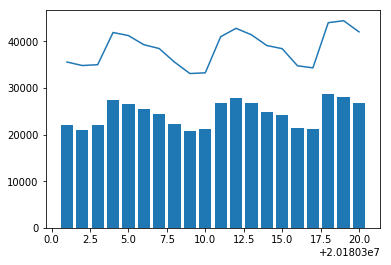

In [45]:
plt.plot(total_sessions.date,total_sessions.sessions)
plt.bar(total_sessions.date,total_sessions.funnel_sessions)
plt.show()

## setting defaults
- size
- ticks
- title

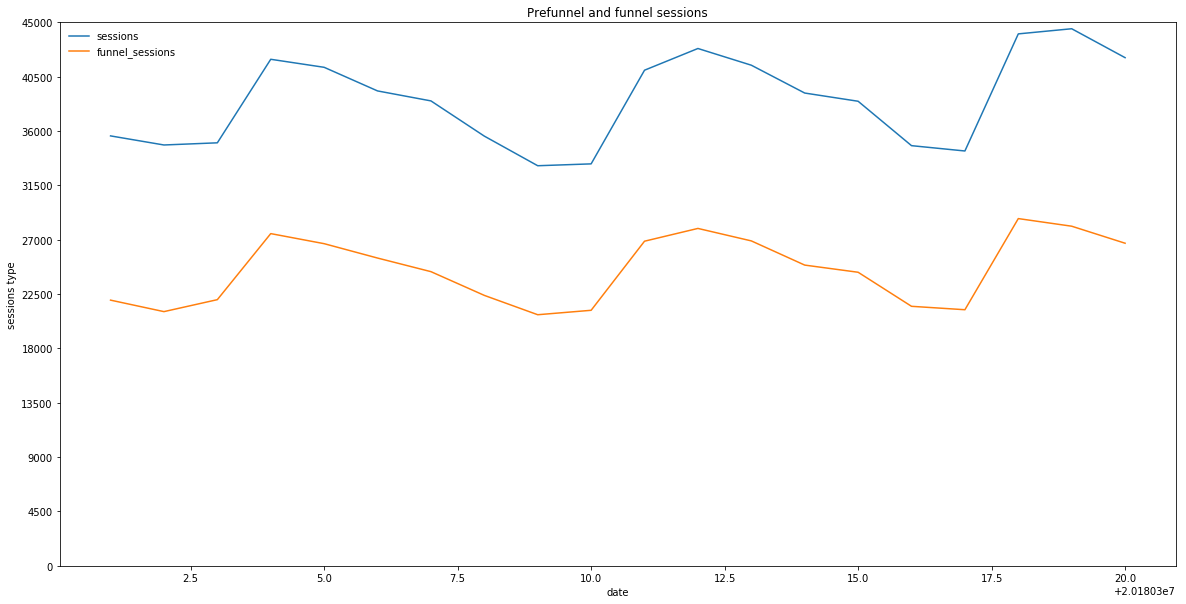

In [25]:
plt.figure(figsize=(20,10))

plt.plot(total_sessions.date,total_sessions.sessions)
plt.plot(total_sessions.date,total_sessions.funnel_sessions)

plt.ylim(0,45000)
plt.legend(loc='upper left', frameon=False)
plt.xlabel("date")
plt.ylabel("sessions type")
plt.title("Prefunnel and funnel sessions")

plt.yticks(np.linspace(0,45000,11,endpoint=True))



plt.show()

## Having other plots
- scatter
- bar

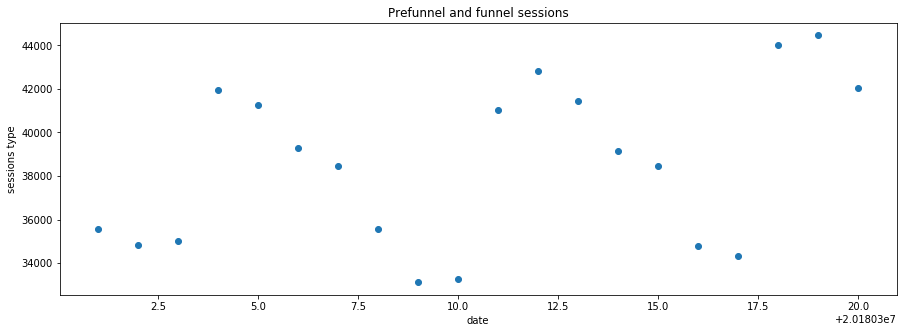

In [32]:
plt.figure(figsize=(15,5))

plt.scatter(total_sessions.date,total_sessions.sessions)
# plt.plot(total_sessions.date,total_sessions.funnel_sessions)

# plt.ylim(0,45000)
# plt.legend(loc='bottom left', frameon=False)
plt.xlabel("date")
plt.ylabel("sessions type")
plt.title("Prefunnel and funnel sessions")

# plt.yticks(np.linspace(0,45000,11,endpoint=True))

plt.show()

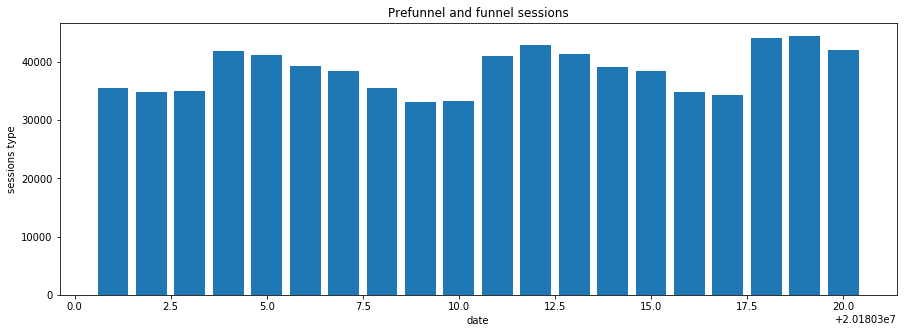

In [33]:
plt.figure(figsize=(15,5))

plt.bar(total_sessions.date,total_sessions.sessions)
# plt.plot(total_sessions.date,total_sessions.funnel_sessions)

# plt.ylim(0,45000)
# plt.legend(loc='bottom left', frameon=False)
plt.xlabel("date")
plt.ylabel("sessions type")
plt.title("Prefunnel and funnel sessions")

# plt.yticks(np.linspace(0,45000,11,endpoint=True))

plt.show()

## Subplots

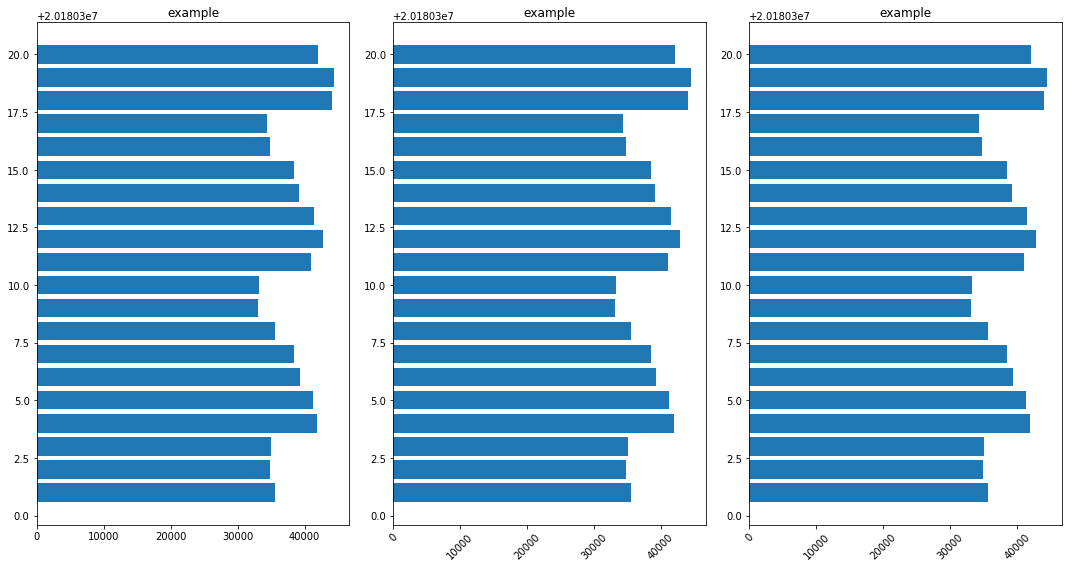

In [34]:
plt.figure(figsize=(15,8))

plt.subplot(1, 3, 1)
plt.barh(total_sessions.date, total_sessions.sessions)
plt.title("example")

plt.subplot(1, 3, 2)
plt.barh(total_sessions.date, total_sessions.sessions)
plt.title("example")
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.barh(total_sessions.date, total_sessions.sessions)
plt.title("example")
plt.xticks(rotation=45)


plt.tight_layout()


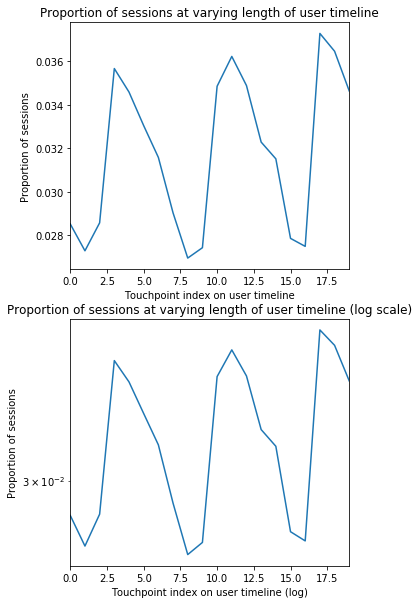

In [35]:
# df_ = (
#     df.loc[df['event_index'] <= 20]
#     .groupby('event_index')
#     .agg(np.sum)
# )


fig, [ax1, ax2] = plt.subplots(2, figsize=(5, 10))

(total_sessions.funnel_sessions / total_sessions.sessions.sum()).plot(ax=ax1)
(total_sessions.funnel_sessions / total_sessions.sessions.sum()).plot(logy=True, ax=ax2)

ax1.set_title('Proportion of sessions at varying length of user timeline')
ax1.set_ylabel('Proportion of sessions')
ax1.set_xlabel('Touchpoint index on user timeline')
ax2.set_title('Proportion of sessions at varying length of user timeline (log scale)')

ax2.set_xlabel('Touchpoint index on user timeline (log)')
ax2.set_ylabel('Proportion of sessions');

## Using functions to plot out something

In [ ]:

def get_redirect_distribution(channelname='criteo-retargeting'):
    # function that looks at the proportion of sessions, conversions, and conversion rate for a specific channel.
    subset = df.loc[df.channel == channelname]
    fig, [ax1, ax2, ax3] = plt.subplots(3, figsize=(10,22))
    
    subset = subset.loc[subset.event_index < 15].reset_index()
    (
        subset.sessions / subset.sessions.sum()
    ).plot(kind='bar', title='distribution of sessions {}'.format(channelname), ax=ax1)
    (
        subset.conversions / subset.conversions.sum()
    ).plot(kind='bar', title='distribution of conversions {}'.format(channelname), ax=ax2)
    
    (
        subset.conversions / subset.sessions
    ).plot(kind='bar', title='conversion rate {}'.format(channelname), ax=ax3)
    ax3.legend(loc='best')
    return subset


In [52]:
first="ghi"
second="yuyu"
f'abc {first} abc {second} abc'

'abc ghi abc yuyu abc'

## ggplot

In [11]:
# ggplot(genericdf.reset_index(), aes(x='whichdate', weight = 'retentionrate',fill='whichdate')) + geom_bar(stat='identity') + ggtitle("Overall Retention, main sources")

In [3]:
rawdata = (
    pd.read_csv("../RGT-exploratory-data-analysis/data/peak_hour_of_day.csv")
    .pipe(lambda x:x.assign(category=np.where(
        x.year == 2016, 'first', np.where(x.year == 2017, 'second', 'third'))
    )))

In [4]:
rawdata.head()


,country,year,month,hour,is_30,num_users,category
0,HK,2016.0,1.0,0.0,first_half,1449,first
1,HK,2016.0,1.0,0.0,second_half,1799,first
2,HK,2016.0,1.0,1.0,first_half,1890,first
3,HK,2016.0,1.0,1.0,second_half,2005,first
4,HK,2016.0,1.0,2.0,first_half,2196,first


In [ ]:
g = ggplot(rawdata.query("country == 'HK'"), aes(x='hour',y='num_users',color='category')) +\
geom_line() + facet_wrap("month") + theme(plot_margin = dict(right = 10, top=3))
g

AttributeError: 'DataFrame' object has no attribute 'sort'

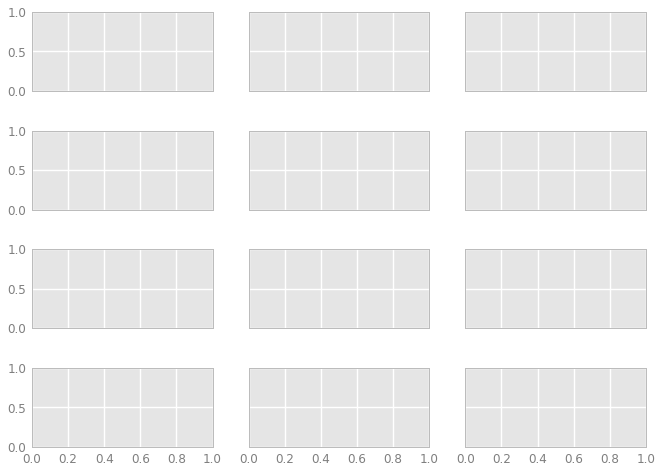

In [75]:
ggplot(rawdata.query("country == 'HK'"), aes(x='hour', weight = 'num_users',fill='category')) +\
geom_bar(stat='identity') + facet_wrap('month')